<a href='https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb' target='_parent'><img src='https://colab.research.google.com/assets/colab-badge.svg' alt='Open In Colab"/></a>

# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

### **Задание 0**
Для чего фиксируем сиды в домашках?

для воспроизводимости экспериментов, которые включают в себя случайность

например, чтобы разделение на обучающую и тестовую выборки было одинаковым при разных запусках, чтобы инициализация весов модели происходила одинаково и т.п.

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [2]:
df_train = pd.read_csv("https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv")

print('Train data shape:', df_train.shape)
print('Test data shape: ', df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

In [3]:
# в пяти столбцах есть пропуски
df_train.isna().sum()[df_train.isna().sum() > 0]

mileage      202
engine       202
max_power    196
torque       203
seats        202
dtype: int64

In [4]:
# есть 985 явные строки дубликата
df_train[df_train.duplicated()].shape[0]

985

In [5]:
from ydata_profiling import ProfileReport


profile = ProfileReport(df_train, title='Pandas Profiling Report', explorative=True)
profile.to_file("eda_report.html")

c:\Users\danya\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 75.95it/s]


- как и посмотрели раньше, в трейне достаточно много (7%) дубликатов
- есть и числовые, и категориальные признаки
- расределение selling_price имеет длинный хвост
- есть текстовые поля torque, max_power, engine и mileage, которые предстоит распарсить
- transmission и year сильнее всего коррелируют с selling_price

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [6]:
df_train.describe()

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [7]:
df_test.describe()

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


In [8]:
df_train.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [9]:
df_test.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


In [10]:
mean_train = df_train['selling_price'].mean()
median_train = df_train['selling_price'].median()
mean_test = df_test['selling_price'].mean()
median_test = df_test['selling_price'].median()

print(f'Train - Mean: {mean_train}, Median: {median_train}')
print(f'Test - Mean: {mean_test}, Median: {median_test}')
print()
print(f'Difference between mean selling prices (abs): {abs(mean_train - mean_test):.2f}')
print(f'Difference between median selling prices (abs): {abs(median_train - median_test):.2f}')
print()
print(f'Difference between mean selling prices (rel): {abs(mean_train / mean_test - 1):.2%}')
print(f'Difference between median selling prices (real): {abs(median_train / median_test - 1):.2%}')

Train - Mean: 639515.1971710244, Median: 450000.0
Test - Mean: 617901.042, Median: 434999.0

Difference between mean selling prices (abs): 21614.16
Difference between median selling prices (abs): 15001.00

Difference between mean selling prices (rel): 3.50%
Difference between median selling prices (real): 3.45%


средние значения целевой переменной в трейне несколько выше, чем в тесте (на 3.5%)

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [ ] Отобразите такие объекты (0.05 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [11]:
# если отюросить целевую переменную, то дубликатов становится больше на ~200
df_train_duplicated = df_train[df_train.drop('selling_price', axis=1).duplicated()]
df_train_duplicated.shape[0]

1159

In [12]:
df_train_duplicated.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6542,Maruti Omni MPI STD BSIII 8-STR W/ IMMOBILISER,2008,110000,48676,Petrol,Individual,Manual,First Owner,19.7 kmpl,796 CC,35 bhp,"6.1@ 3,000(kgm@ rpm)",8.0
2659,Maruti Swift AMT ZXI,2018,600000,69779,Petrol,Dealer,Automatic,First Owner,22.0 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.0
984,Toyota Etios VX,2017,625000,25538,Petrol,Trustmark Dealer,Manual,First Owner,16.78 kmpl,1496 CC,88.73 bhp,132Nm@ 3000rpm,5.0
2902,Maruti Swift Dzire VXI,2014,450000,30000,Petrol,Individual,Manual,First Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
5064,Maruti Swift Dzire VDI,2014,470000,60000,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0


In [13]:
df_train = df_train.drop_duplicates(
    subset=df_train.drop('selling_price', axis=1).columns,  # учитываем только признаки
    keep='first'  # оставляем первую строку
)

df_train.reset_index(inplace=True, drop=True)

In [14]:
assert df_train.shape == (5840, 13)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [15]:
df_train = df_train.copy()

In [16]:
def parse_mileage(x):
    try:
        return float(x.split()[0])
    except:
        return


df_train.mileage = df_train.mileage.apply(parse_mileage)
df_test.mileage = df_test.mileage.apply(parse_mileage)

In [17]:
def parse_engine(x):
    try:
        return float(x.split()[0])
    except:
        return


df_train.engine = df_train.engine.apply(parse_engine)
df_test.engine = df_test.engine.apply(parse_engine)

In [18]:
def parse_power(x):
    try:
        return float(x.split()[0])
    except:
        return


df_train.max_power = df_train.max_power.apply(parse_power)
df_test.max_power = df_test.max_power.apply(parse_power)

In [19]:
# вариантов было очень много...
def parse_torque(x):
    g = 9.80665

    if x is np.nan:
        return pd.Series([x, x], index=['torque', 'max_torque_rpm'], dtype=float)
    try:
        first, last = map(lambda z: z.strip(), x.split('@', 1))
    except:
        try:
            first, last = map(lambda z: z.strip(), x.split('at', 1))
        except:
            try:
                first, last = map(lambda z: z.strip(), x.split('/', 1))
            except:
                return pd.Series(
                    [float(x.replace('Nm', '')), np.nan],
                    index=['torque', 'max_torque_rpm'], dtype=float
                )
        
    last = last.replace(',', '')
    
    if '(' in first:
        first = first.split('(')[0]
        
    first = first.lower()
    last = last.lower()
        
    if 'kgm' in first or 'kgm' in last:
        first = float(first.replace('kgm', '').replace(' ', '')) * g
    elif 'nm' in first:
        first = float(first.replace('nm', '').replace(' ', ''))    
    
    if 'rpm' in last:
        last = last.replace('rpm', '').replace(' ', '')
    
    if '(' in last:
        last = last.split('(')[0]
        
    if '+/-' in last:
        last = str(sum(map(float, last.split('+/-'))))
        
    if '-' in last:
        last = last.split('-')[-1].strip()
    
    if '~' in last:
        last = last.split('~')[-1].strip()
        
    last = float(last)
    return pd.Series([first, last], index=['torque', 'max_torque_rpm'], dtype=float)


df_train[['torque', 'max_torque_rpm']] = df_train['torque'].apply(parse_torque)
df_test[['torque', 'max_torque_rpm']] = df_test['torque'].apply(parse_torque)

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [20]:
na_cols = df_train.columns[df_train.isna().sum() > 0]
medians = df_train[na_cols].median()

for col in na_cols:
    df_train[col] = df_train[col].fillna(medians[col])
    df_test[col] = df_test[col].fillna(medians[col])

In [21]:
df_train.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
seats             0
max_torque_rpm    0
dtype: int64

медиана меньше учитывает в себя влияние выбросов, что может служить лучшей оценкой на практике

однако, заполнение медианой далеко не всегда "ок". например, когда мы знаем что-то дополнительно про признак или имеем модель, которая может его предсказывать 

правильно использовать медиану, посчитанную по трейну, для обоих выборок, чтобы не допустить лика

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [22]:
df_train.engine = df_train.engine.astype(int)
df_train.seats = df_train.seats.astype(int)

df_test.engine = df_test.engine.astype(int)
df_test.seats = df_test.seats.astype(int)

In [23]:
df_train.seats.nunique()

9

потому что кардинальность признака мала, и мы можем рассмотреть каждое значение как отдельный класс

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [24]:
# скопированная ячейка
df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.430841,1429.448973,87.906371,175.357443,5.426712,3046.645205
std,4.095622,5.354320e+05,6.007114e+04,3.985973,485.662834,31.640418,107.145160,0.982344,912.076209
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,47.071920,2.000000,1400.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,111.800000,5.000000,2250.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.370000,1248.000000,81.860000,160.000000,5.000000,3000.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,200.055660,5.000000,4000.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,1863.263500,14.000000,21800.000000


In [25]:
df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.430841,1429.448973,87.906371,175.357443,5.426712,3046.645205
std,4.095622,5.354320e+05,6.007114e+04,3.985973,485.662834,31.640418,107.145160,0.982344,912.076209
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,47.071920,2.000000,1400.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,111.800000,5.000000,2250.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.370000,1248.000000,81.860000,160.000000,5.000000,3000.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,200.055660,5.000000,4000.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,1863.263500,14.000000,21800.000000


In [26]:
# скопированная ячейка
df_test.describe()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
count,1000.000000,1.000000e+03,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.33881,1454.87600,90.841670,177.617377,5.403000,3099.776000
std,4.012149,7.585539e+05,48486.218662,3.95175,521.99574,34.893389,103.734516,0.912921,878.545644
min,1995.000000,3.100000e+04,1303.000000,0.00000,624.00000,34.200000,48.000000,4.000000,1500.000000
25%,2011.000000,2.500000e+05,37000.000000,16.55000,1197.00000,69.000000,111.700000,5.000000,2500.000000
50%,2014.000000,4.349990e+05,61500.000000,19.37000,1248.00000,82.425000,160.000000,5.000000,3000.000000
75%,2017.000000,6.700000e+05,100000.000000,22.30000,1582.00000,102.000000,205.000000,5.000000,4000.000000
max,2020.000000,6.000000e+06,375000.000000,32.26000,3604.00000,280.000000,1421.964250,9.000000,5200.000000


In [27]:
df_test.describe()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
count,1000.000000,1.000000e+03,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.33881,1454.87600,90.841670,177.617377,5.403000,3099.776000
std,4.012149,7.585539e+05,48486.218662,3.95175,521.99574,34.893389,103.734516,0.912921,878.545644
min,1995.000000,3.100000e+04,1303.000000,0.00000,624.00000,34.200000,48.000000,4.000000,1500.000000
25%,2011.000000,2.500000e+05,37000.000000,16.55000,1197.00000,69.000000,111.700000,5.000000,2500.000000
50%,2014.000000,4.349990e+05,61500.000000,19.37000,1248.00000,82.425000,160.000000,5.000000,3000.000000
75%,2017.000000,6.700000e+05,100000.000000,22.30000,1582.00000,102.000000,205.000000,5.000000,4000.000000
max,2020.000000,6.000000e+06,375000.000000,32.26000,3604.00000,280.000000,1421.964250,9.000000,5200.000000


есть, так как мы выбросили часть строк, а там, где заполняли медианой, среднее распределение съехало к ней

например, средний selling_price в трейне уменьшился с 6.395152e+05 до 5.229601e+05, чего не заметно для теста. но разница между средними еще сильнее увеличилась, только в другую сторону 

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

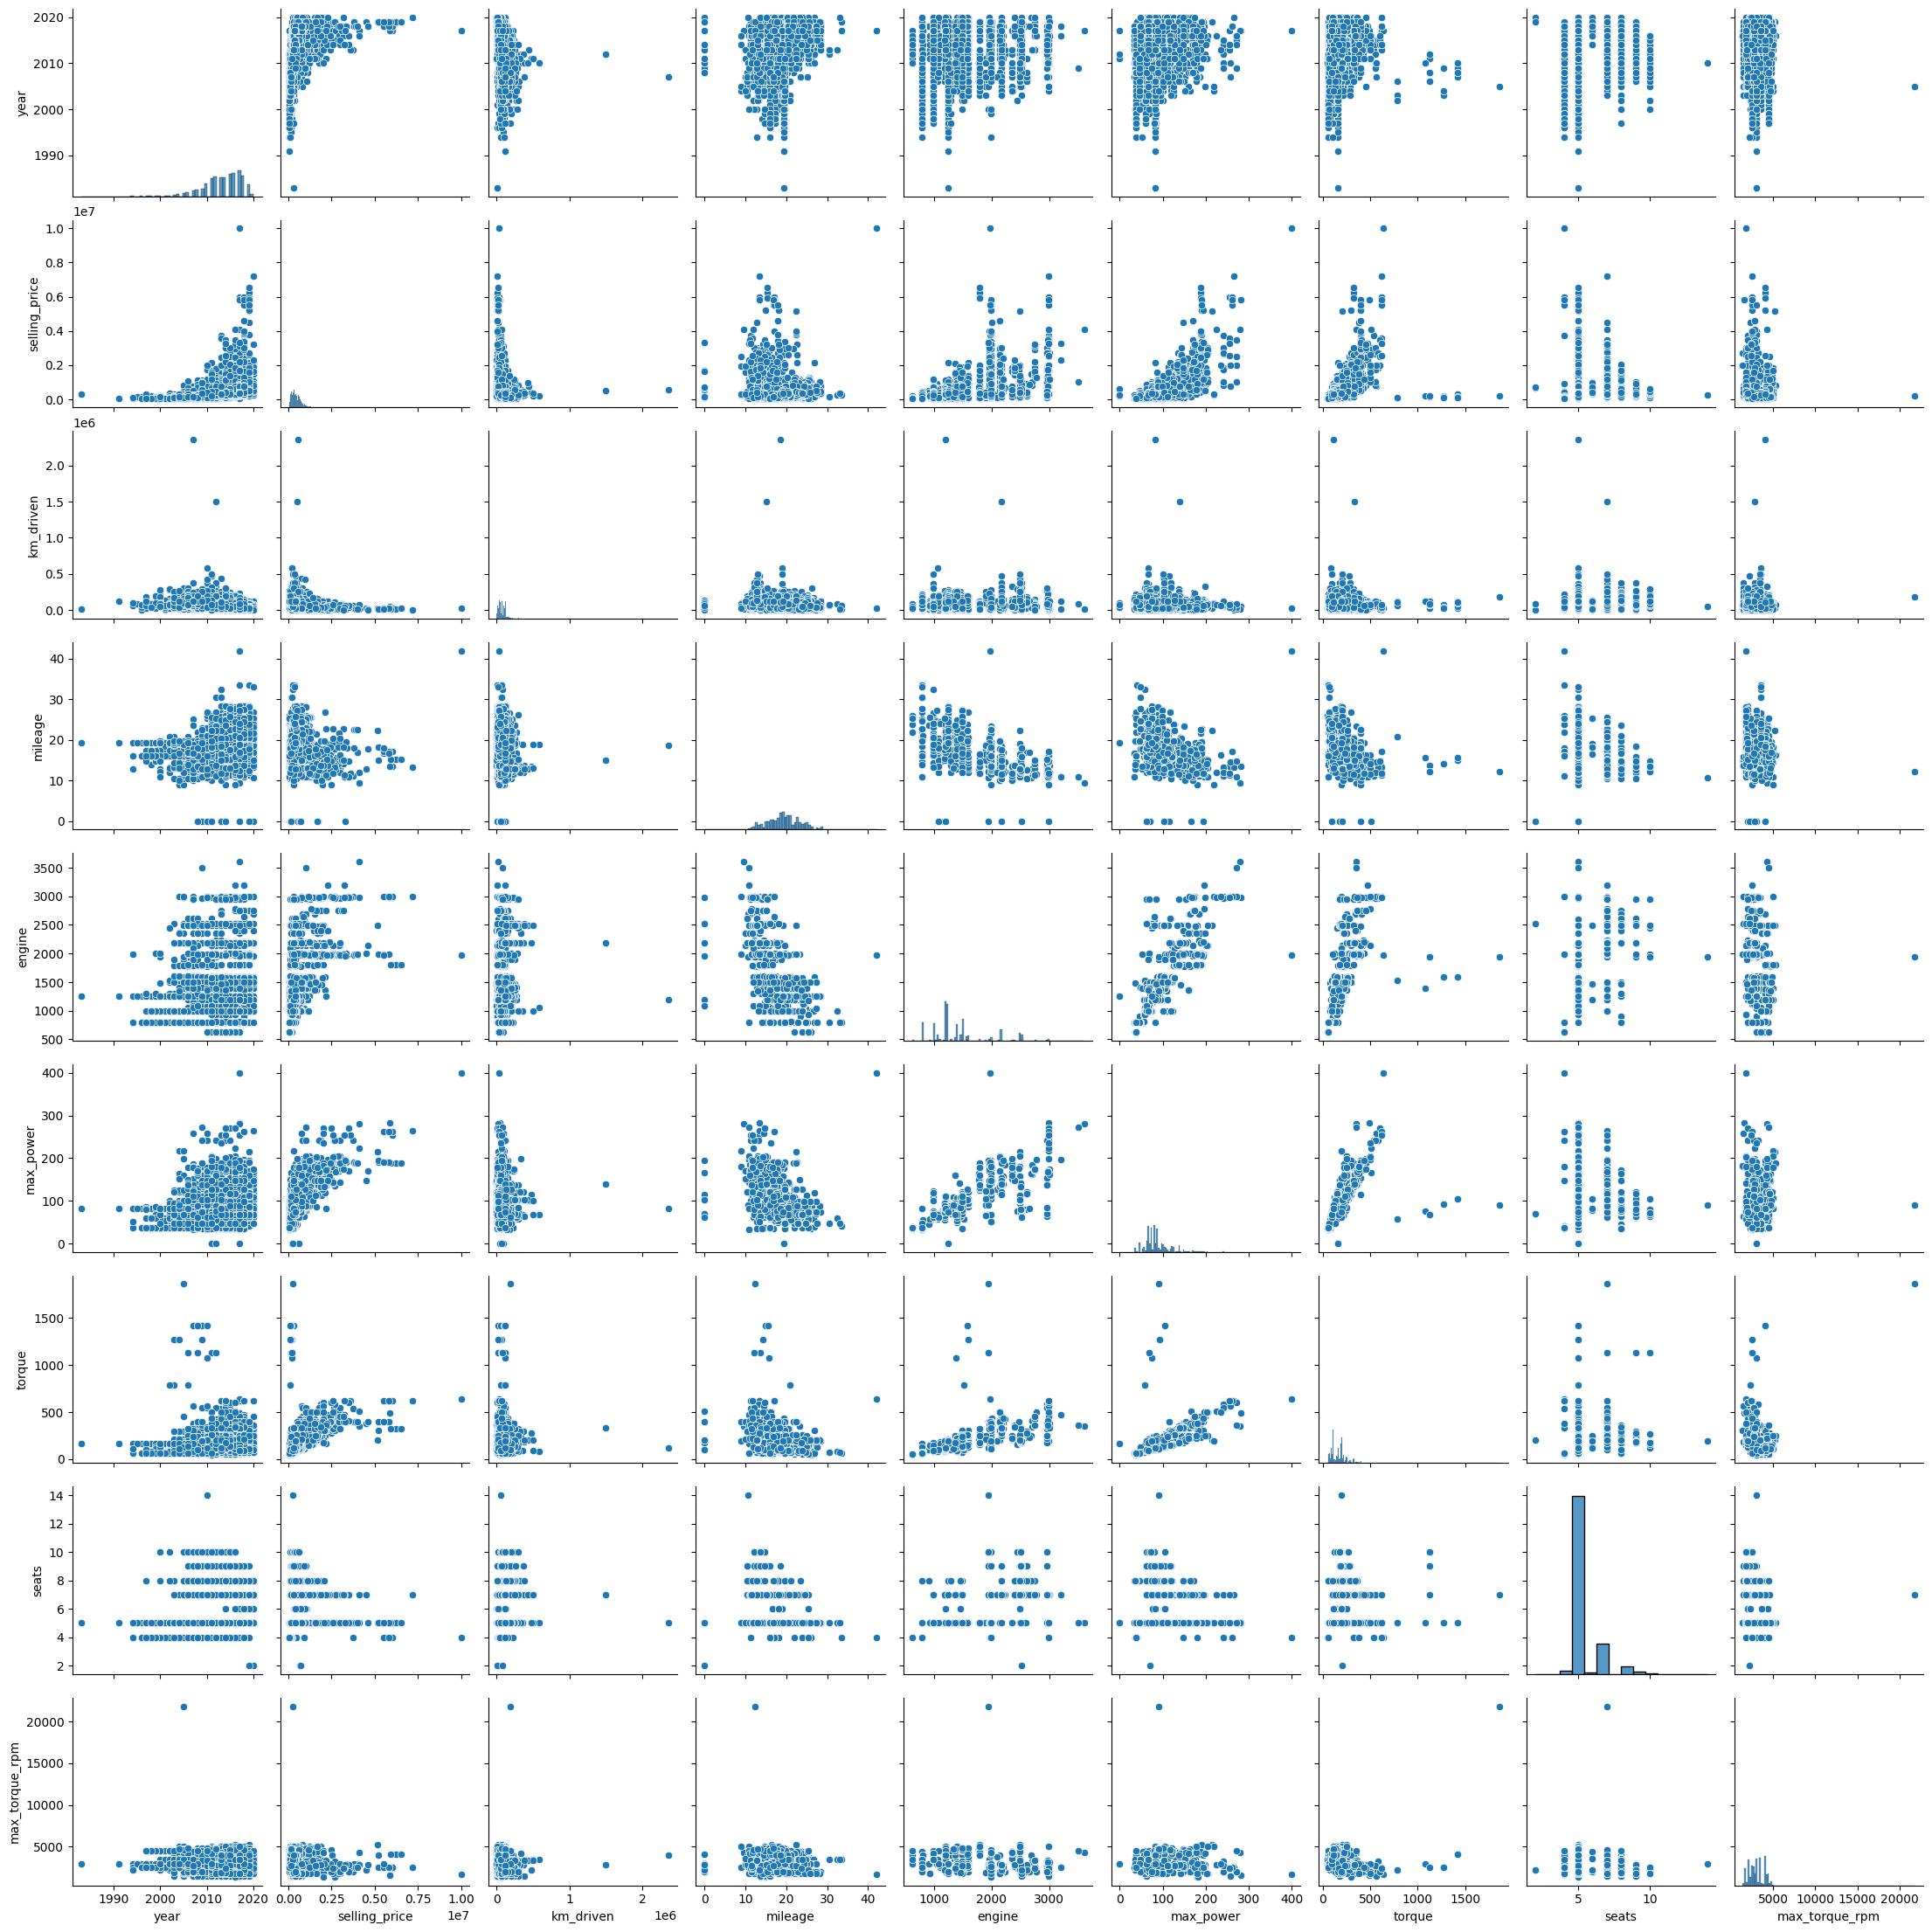

In [33]:
sns.pairplot(df_train)

- видимая связь с целевой переменной: year, max_power, torque
- корреляции: torque & max_power, max-power & engine, torque & max_torque_rpm

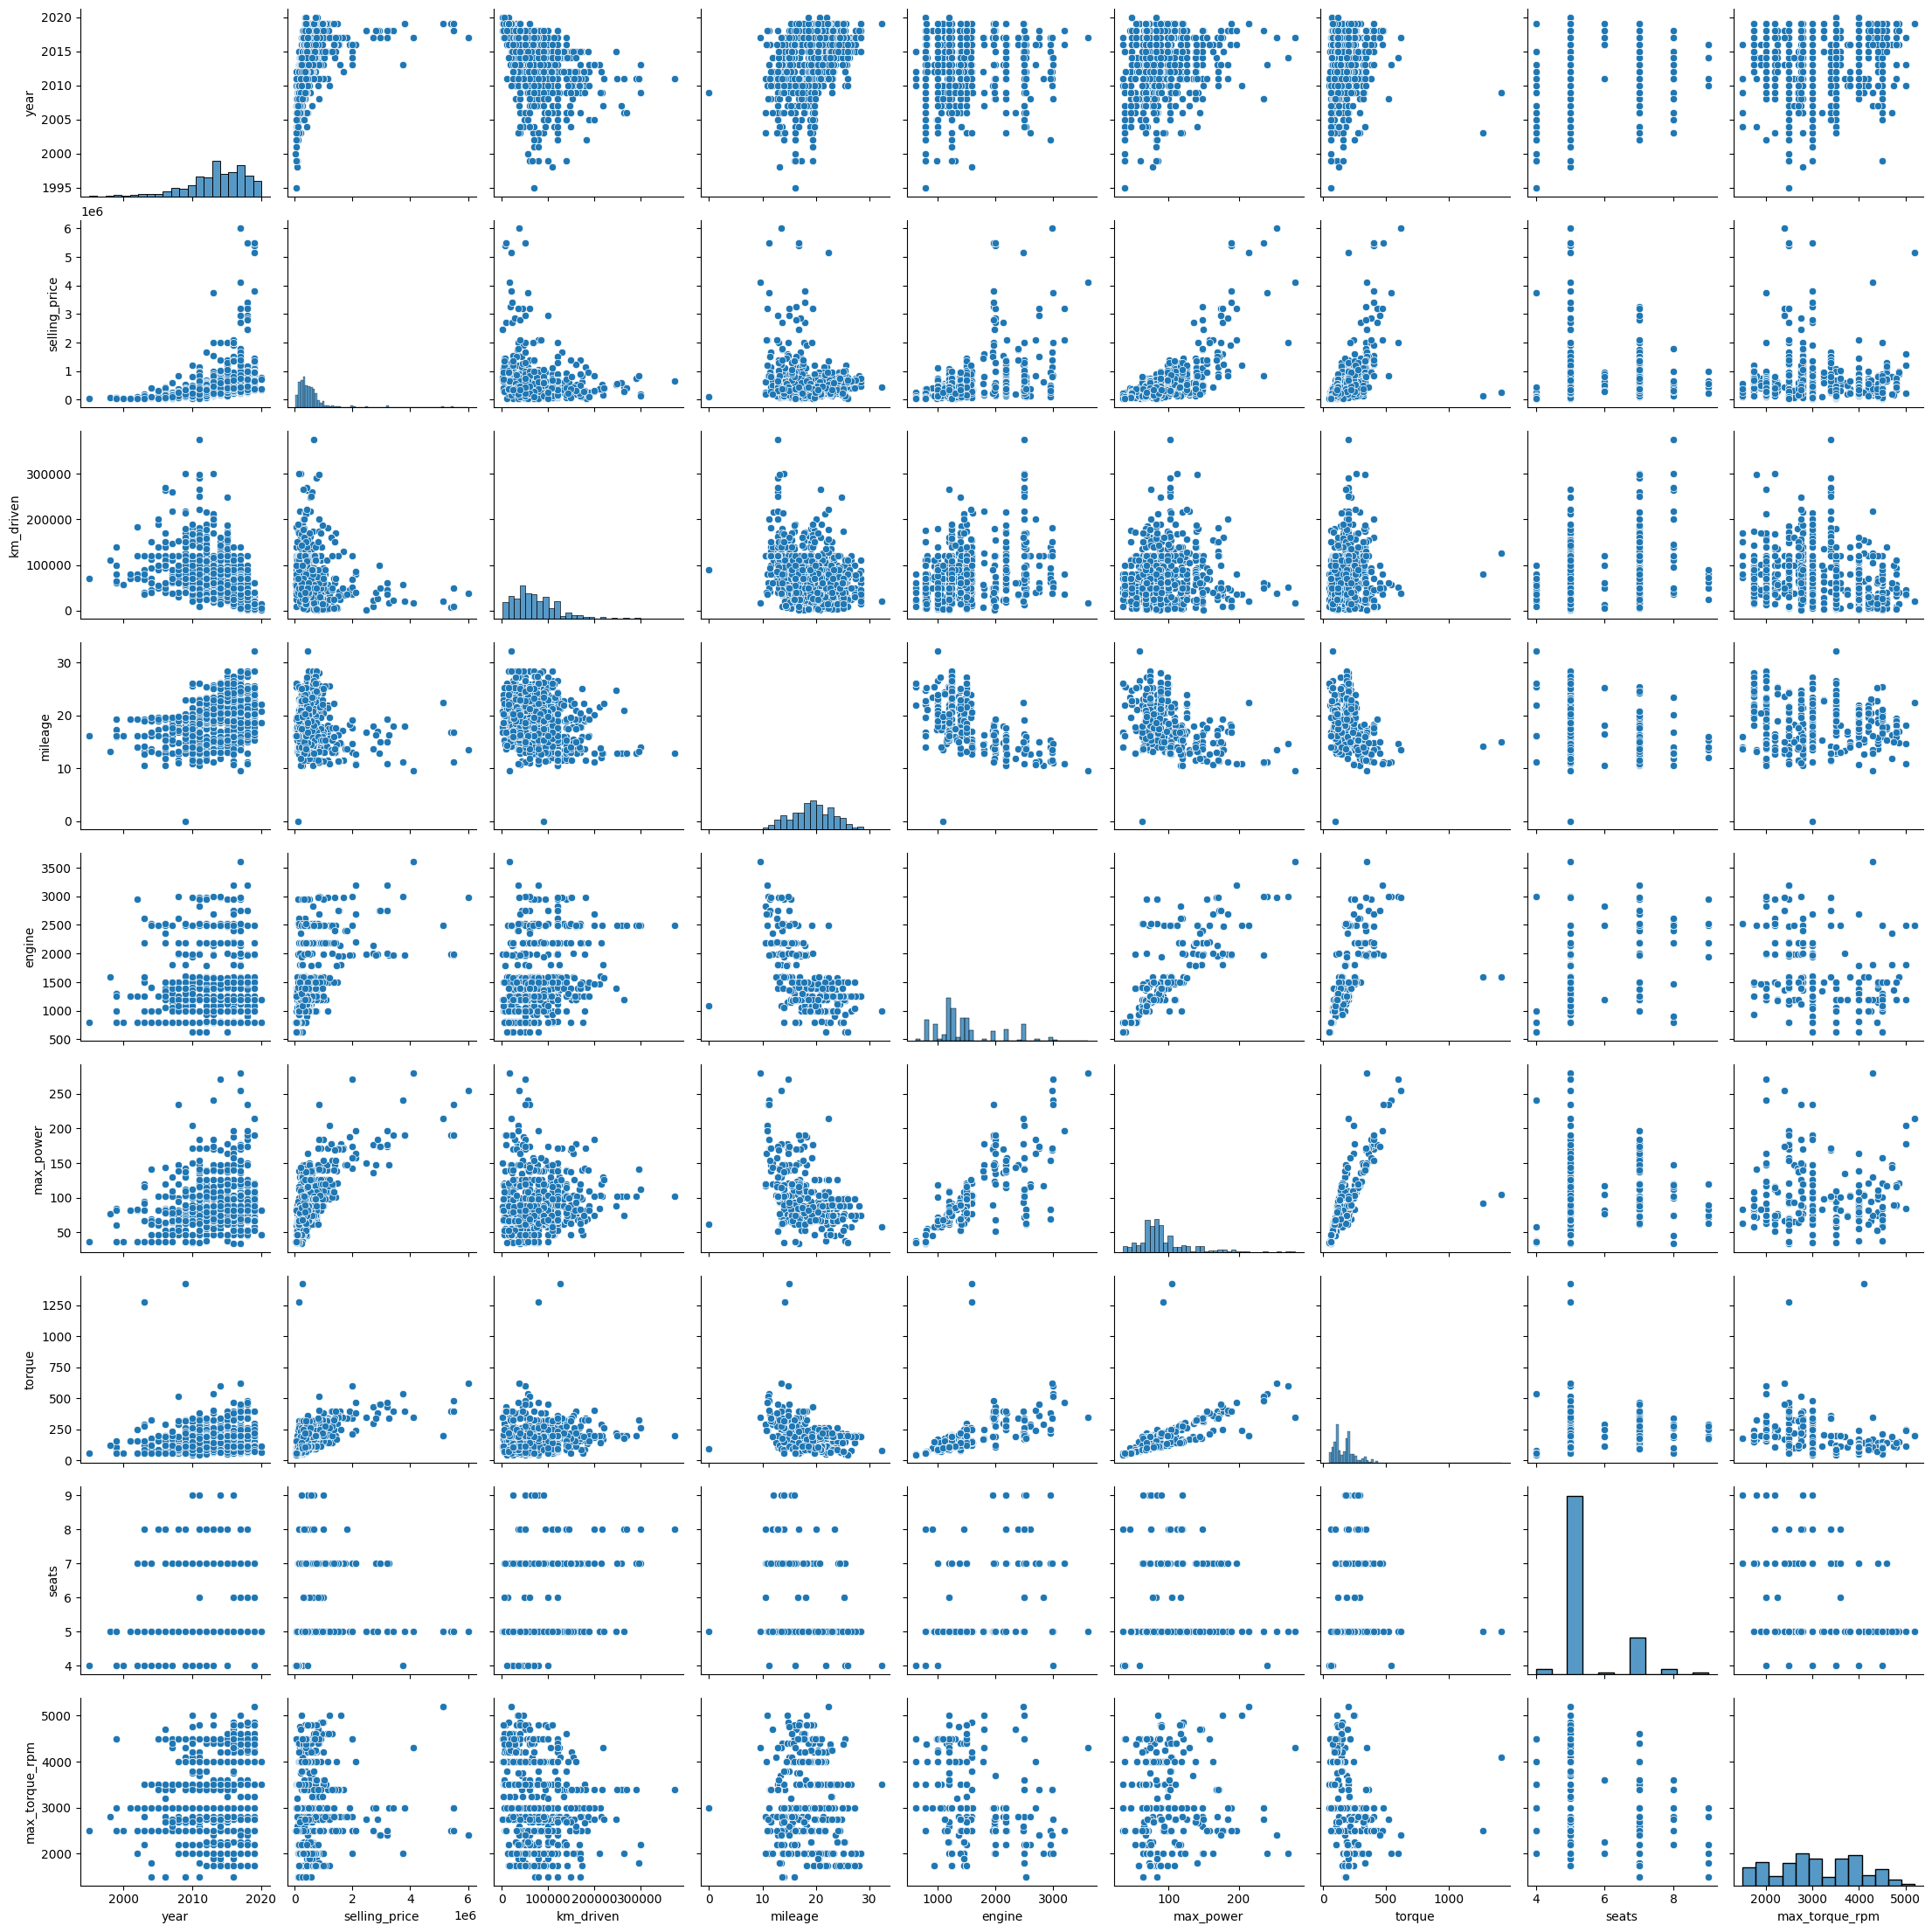

In [32]:
sns.pairplot(df_test)

да, распределения в train и test похожи

хотя отдельные взаимные распределения выглядят отличающимися из-за масштабов, т.к. в трейне есть небольшое множество объектов, похожих на выбросы с очень большими значениями некоторых признаков

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

In [28]:
df_train.corr(numeric_only=True)

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
year,1.000000,0.427279,-0.368966,0.341334,0.002819,0.156858,0.053151,0.041178,0.048432
selling_price,0.427279,1.000000,-0.164828,-0.104769,0.447672,0.692814,0.466466,0.149953,-0.088720
km_driven,-0.368966,-0.164828,1.000000,-0.182086,0.229766,0.024588,0.112956,0.192328,-0.204651
mileage,0.341334,-0.104769,-0.182086,1.000000,-0.572893,-0.373390,-0.237616,-0.451059,-0.179445
engine,0.002819,0.447672,0.229766,-0.572893,1.000000,0.681117,0.600069,0.652172,-0.246207
max_power,0.156858,0.692814,0.024588,-0.373390,0.681117,1.000000,0.659967,0.244112,-0.021474
torque,0.053151,0.466466,0.112956,-0.237616,0.600069,0.659967,1.000000,0.316274,-0.268873
seats,0.041178,0.149953,0.192328,-0.451059,0.652172,0.244112,0.316274,1.000000,-0.207390
max_torque_rpm,0.048432,-0.088720,-0.204651,-0.179445,-0.246207,-0.021474,-0.268873,-0.207390,1.000000


<Axes: >

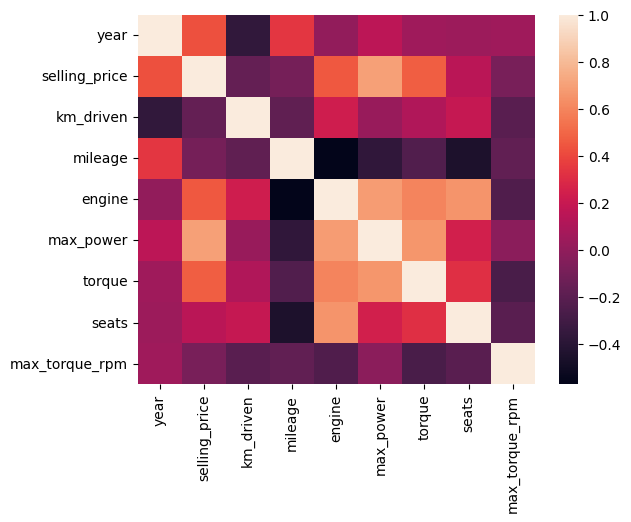

In [32]:
sns.heatmap(df_train.corr(numeric_only=True))

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

- year & engine - наименее скоррелированы
- engine & seats - довольно сильная положительная линейная зависимость
- да, потому что корреляция отрицательная (-0.368966)

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ]

Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [29]:
def spearman_correlation(x, y):
    rank_x = np.argsort(np.argsort(x))
    rank_y = np.argsort(np.argsort(y))
    n = len(x)
    d = rank_x - rank_y
    spearman_corr = 1 - (6 * np.sum(d**2)) / (n * (n**2 - 1))
    return spearman_corr


def calculate_correlations(df):
    numeric_df = df.select_dtypes(include=[np.number])
    columns = numeric_df.columns
    corr_matrix = pd.DataFrame(index=columns, columns=columns)

    for i in range(len(columns)):
        for j in range(len(columns)):
            if i == j:
                corr_matrix.iloc[i, j] = 1.0
            elif pd.isna(corr_matrix.iloc[i, j]):
                corr_value = spearman_correlation(numeric_df[columns[i]], numeric_df[columns[j]])
                
                corr_matrix.iloc[i, j] = corr_value
                corr_matrix.iloc[j, i] = corr_value
    return corr_matrix

In [30]:
calculate_correlations(df_train)

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
year,1.0,0.70506,-0.566218,0.34296,-0.034677,0.166875,0.103953,0.050485,0.071432
selling_price,0.70506,1.0,-0.295699,0.026164,0.461866,0.612352,0.581559,0.22067,-0.128938
km_driven,-0.566218,-0.295699,1.0,-0.197687,0.303411,0.040464,0.24207,0.105454,-0.31803
mileage,0.34296,0.026164,-0.197687,1.0,-0.428987,-0.308684,-0.162939,-0.307221,-0.17477
engine,-0.034677,0.461866,0.303411,-0.428987,1.0,0.711526,0.840104,0.36166,-0.370427
max_power,0.166875,0.612352,0.040464,-0.308684,0.711526,1.0,0.778804,0.200687,-0.025185
torque,0.103953,0.581559,0.24207,-0.162939,0.840104,0.778804,1.0,0.286409,-0.524028
seats,0.050485,0.22067,0.105454,-0.307221,0.36166,0.200687,0.286409,1.0,-0.130321
max_torque_rpm,0.071432,-0.128938,-0.31803,-0.17477,-0.370427,-0.025185,-0.524028,-0.130321,1.0


In [31]:
(calculate_correlations(df_train) - df_train.corr('spearman', numeric_only=True)).abs()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
year,0.0,0.002062,0.003441,0.003172,0.003379,0.001077,0.001344,0.002195,0.004744
selling_price,0.002062,0.0,0.000034,0.000022,0.001711,0.000095,0.00085,0.096934,0.000659
km_driven,0.003441,0.000034,0.0,0.000779,0.001093,0.000456,0.000845,0.089863,0.003256
mileage,0.003172,0.000022,0.000779,0.0,0.000884,0.00014,0.000567,0.128237,0.001038
engine,0.003379,0.001711,0.001093,0.000884,0.0,0.001587,0.002321,0.166055,0.003276
max_power,0.001077,0.000095,0.000456,0.00014,0.001587,0.0,0.000794,0.10417,0.000951
torque,0.001344,0.00085,0.000845,0.000567,0.002321,0.000794,0.0,0.1518,0.003235
seats,0.002195,0.096934,0.089863,0.128237,0.166055,0.10417,0.1518,0.0,0.07341
max_torque_rpm,0.004744,0.000659,0.003256,0.001038,0.003276,0.000951,0.003235,0.07341,0.0


в некоторых случаях значения от ручной реализации сильно отличаются...

In [35]:
import phik


df_train.phik_matrix()

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


c:\Users\danya\AppData\Local\Programs\Python\Python312\Lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1924. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
name,1.000000,0.948995,0.994871,0.000000,1.000000,0.799127,1.000000,0.830098,0.999690,1.000000,0.997906,0.999978,0.999985,0.999946
year,0.948995,1.000000,0.219841,0.081574,0.205834,0.232412,0.153714,0.418636,0.279253,0.213156,0.381639,0.185089,0.288178,0.269787
selling_price,0.994871,0.219841,1.000000,0.000000,0.157885,0.334505,0.463058,0.557641,0.649768,0.503682,0.872166,0.687135,0.196447,0.204000
km_driven,0.000000,0.081574,0.000000,1.000000,0.046285,0.000000,0.012824,0.087887,0.081625,0.210747,0.000000,0.000000,0.096223,0.049779
fuel,1.000000,0.205834,0.157885,0.046285,1.000000,0.050771,0.053721,0.030943,0.582304,0.644421,0.236006,0.349334,0.450714,0.564479
seller_type,0.799127,0.232412,0.334505,0.000000,0.050771,1.000000,0.127968,0.176612,0.064736,0.160346,0.331904,0.147800,0.032173,0.149248
transmission,1.000000,0.153714,0.463058,0.012824,0.053721,0.127968,1.000000,0.096990,0.331889,0.520161,0.511877,0.362304,0.045734,0.030724
owner,0.830098,0.418636,0.557641,0.087887,0.030943,0.176612,0.096990,1.000000,0.152406,0.186011,0.121438,0.059774,0.046741,0.111955
mileage,0.999690,0.279253,0.649768,0.081625,0.582304,0.064736,0.331889,0.152406,1.000000,0.588155,0.687235,0.377738,0.679979,0.311541
engine,1.000000,0.213156,0.503682,0.210747,0.644421,0.160346,0.520161,0.186011,0.588155,1.000000,0.720780,0.611920,0.603400,0.641002


In [30]:
sns.heatmap(df_train.phik_matrix())

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


c:\Users\danya\AppData\Local\Programs\Python\Python312\Lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1924. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(


<Axes: >

- самые высокие у признака name, но он имеет высокую кардинальность, не стоит рассматривать 
- fuel и engine имеют относительно высокое значение
- transmision и engine, что имеет смысл

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [ ]:
# your code here

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [32]:
cat_cols = df_train.columns[df_train.dtypes == 'object'].to_list()
# у меня получалось 8 столбцов вместо 6
# поэтому посчитал, что, наверное, стоит убрать torque и max_torque_rpm
cols_to_remove = cat_cols + ['torque', 'max_torque_rpm'] 
cols_to_remove += ['selling_price']
cols_to_remove

['name',
 'fuel',
 'seller_type',
 'transmission',
 'owner',
 'torque',
 'max_torque_rpm',
 'selling_price']

In [33]:
y_train = df_train.selling_price.copy(deep=True)
X_train = df_train.drop(cols_to_remove, axis=1).copy(deep=True)

In [34]:
assert X_train.shape == (5840, 6)

In [35]:
y_test = df_test.selling_price.copy(deep=True)
X_test = df_test.drop(cols_to_remove, axis=1).copy(deep=True)

In [36]:
assert X_test.shape == (1000, 6)

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE


model = LinearRegression()
model.fit(X_train, y_train)

preds_train = model.predict(X_train)
preds_test = model.predict(X_test)

print(f'Значение r2_score на train: {r2_score(y_train, preds_train)}')
print(f'Значение MSE на train: {MSE(y_train, preds_train)}')

print(f'Значение r2_score на test: {r2_score(y_test, preds_test)}')
print(f'Значение MSE на test: {MSE(y_test, preds_test)}')

Значение r2_score на train: 0.5922591702157298
Значение MSE на train: 116874153930.02907
Значение r2_score на test: 0.5941419794788373
Значение MSE на test: 233298779730.45807


In [38]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error


root_mean_squared_error(y_test, preds_test), mean_absolute_percentage_error(y_test, preds_test)

(483010.1238384741, 0.6221513773044469)

судя по r2 модель может объяснить часть дисперсии зависимой переменной, но до хорошей модели далеко (rmse и mape очень большие)

### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [39]:
def calculate_r2(y_true, y_pred):
    # сумма квадратов y_true
    ss_total = sum((y_true - y_true.mean()) ** 2)
    # сумма квадратов остатков (y_true - y_pred)
    ss_residual = sum((y_true - y_pred) ** 2)

    r2 = 1 - (ss_residual / ss_total)
    return r2


r2_train = calculate_r2(y_train, preds_train)
r2_test = calculate_r2(y_test, preds_test)


print(f'Ручной расчет r2_score на train: {r2_train}')
print(f'Ручной расчет r2_score на test: {r2_test}')

Ручной расчет r2_score на train: 0.5922591702157298
Ручной расчет r2_score на test: 0.5941419794788372


- сумма квадратов общая: это сумма квадратов отклонений фактических значений от их среднего. она показывает общую вариацию в данных
- сумма квадратов остатков: это сумма квадратов отклонений предсказанных значений от фактических значений. она показывает, сколько вариации не объясняется моделью
- r2 = 1 - ss_residual / ss_total. отражает долю вариации, которую объясняет модель

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [40]:
def calculate_adjusted_r2(y_true, y_pred, n, k):
    ss_total = sum((y_true - y_true.mean()) ** 2)
    ss_residual = sum((y_true - y_pred) ** 2)

    r2 = 1 - (ss_residual / ss_total)
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
    return adjusted_r2


adjusted_r2_train = calculate_adjusted_r2(y_train, preds_train, X_train.shape[0], X_train.shape[1])
adjusted_r2_test = calculate_adjusted_r2(y_test, preds_test, X_test.shape[0], X_test.shape[1])

print(f'Ручной расчет adjusted r2_score на train: {adjusted_r2_train}')
print(f'Ручной расчет adjusted r2_score на test: {adjusted_r2_test}')

Ручной расчет adjusted r2_score на train: 0.5918397556814069
Ручной расчет adjusted r2_score на test: 0.5916896651554464


r2 adjusted применяется, когда необходимо оценить качество модели регрессии с учетом количества признаков. например, когда добавляются новые переменные, которые могут не улучшать модель, но увеличивают значение r2


### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [41]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [42]:
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

preds_train = model_scaled.predict(X_train_scaled)
preds_test = model_scaled.predict(X_test_scaled)

print(f'Значение r2_score на train: {r2_score(y_train, preds_train)}')
print(f'Значение MSE на train: {MSE(y_train, preds_train)}')

print(f'Значение r2_score на test: {r2_score(y_test, preds_test)}')
print(f'Значение MSE на test: {MSE(y_test, preds_test)}')

Значение r2_score на train: 0.5922591702157305
Значение MSE на train: 116874153930.0289
Значение r2_score на test: 0.5941419794788517
Значение MSE на test: 233298779730.44977


для сравнения метрики до стандартизации, разница незначительна

- Значение r2_score на train: 0.5922591702157298
- Значение MSE на train: 116874153930.02907
- Значение r2_score на test: 0.5941419794788373
- Значение MSE на test: 233298779730.45807

### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [43]:
sort_order = np.argsort(np.abs(model_scaled.coef_))

for col_name, coef_value in zip (
    X_train.columns[sort_order[::-1]].to_list(),
    model_scaled.coef_[sort_order[::-1]]
):
    print(col_name, '\t', coef_value)

max_power 	 322807.3532592338
year 	 152772.57084581407
engine 	 61178.49433684743
km_driven 	 -44158.818520052824
mileage 	 28833.925777517183
seats 	 -23209.13248599731


max_power

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [44]:
y_train.mean()

522960.0910958904

In [45]:
from sklearn.linear_model import Lasso


model_lasso = Lasso()
model_lasso.fit(X_train_scaled, y_train)

preds_train = model_lasso.predict(X_train_scaled)
preds_test = model_lasso.predict(X_test_scaled)

print(f'Значение r2_score на train: {r2_score(y_train, preds_train)}')
print(f'Значение MSE на train: {MSE(y_train, preds_train)}')

print(f'Значение r2_score на test: {r2_score(y_test, preds_test)}')
print(f'Значение MSE на test: {MSE(y_test, preds_test)}')

Значение r2_score на train: 0.5922591701804456
Значение MSE на train: 116874153940.1429
Значение r2_score на test: 0.5941408124026636
Значение MSE на test: 233299450599.1693


In [46]:
sort_order = np.argsort(np.abs(model_lasso.coef_))

for col_name, coef_value in zip (
    X_train.columns[sort_order[::-1]].to_list(),
    model_lasso.coef_[sort_order[::-1]]
):
    print(col_name, '\t', coef_value)

max_power 	 322808.23691946955
year 	 152772.39021419565
engine 	 61173.66240922123
km_driven 	 -44157.6898579426
mileage 	 28832.043395883877
seats 	 -23206.255649080078


In [47]:
from sklearn.linear_model import Lasso

# так как сам значения таргета большие => можно ожидать большие значения ошибок сами по себе,
# поэтому попробовал выкрутить альфу, чтобы добиться зануления одного из признаков
model_lasso = Lasso(alpha=10_000)
model_lasso.fit(X_train_scaled, y_train)

preds_train = model_lasso.predict(X_train_scaled)
preds_test = model_lasso.predict(X_test_scaled)

print(f'Значение r2_score на train: {r2_score(y_train, preds_train)}')
print(f'Значение MSE на train: {MSE(y_train, preds_train)}')

print(f'Значение r2_score на test: {r2_score(y_test, preds_test)}')
print(f'Значение MSE на test: {MSE(y_test, preds_test)}')

Значение r2_score на train: 0.5892503567970667
Значение MSE на train: 117736595208.78355
Значение r2_score на test: 0.5815938080475198
Значение MSE на test: 240511826990.22586


In [48]:
sort_order = np.argsort(np.abs(model_lasso.coef_))

for col_name, coef_value in zip (
    X_train.columns[sort_order[::-1]].to_list(),
    model_lasso.coef_[sort_order[::-1]]
):
    print(col_name, '\t', coef_value)

max_power 	 329230.1475717458
year 	 151810.9838636565
km_driven 	 -32735.11356628639
engine 	 17841.622334842345
mileage 	 9285.99792205308
seats 	 -0.0


с параметром по умолчанию alpha=1 признаки не занулилилось, так сумма весов модели была гораздо меньше суммы значений ошибки 

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
base_estimator = Lasso()
# параметр alpha - коэффициент, с которым в лосс добавляется сумма весов модели
param_grid = {
    'alpha': [0.3, 0.5, 1, 10, 100, 500, 1_000, 5_000, 10_000, 52_000, 100_000]
}

cv = GridSearchCV(base_estimator, param_grid, cv=10)
cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.3, 0.5, 1, 10, 100, 500, 1000, 5000, 10000,
                                   52000, 100000]})

In [51]:
lasso_best_model = cv.best_estimator_


preds_train = lasso_best_model.predict(X_train_scaled)
preds_test = lasso_best_model.predict(X_test_scaled)

print(f'Значение r2_score на train: {r2_score(y_train, preds_train)}')
print(f'Значение MSE на train: {MSE(y_train, preds_train)}')

print(f'Значение r2_score на test: {r2_score(y_test, preds_test)}')
print(f'Значение MSE на test: {MSE(y_test, preds_test)}')

Значение r2_score на train: 0.5892503567970667
Значение MSE на train: 117736595208.78355
Значение r2_score на test: 0.5815938080475198
Значение MSE на test: 240511826990.22586


In [52]:
lasso_best_model.get_params()['alpha']

10000

In [53]:
sort_order = np.argsort(np.abs(lasso_best_model.coef_))

for col_name, coef_value in zip (
    X_train.columns[sort_order[::-1]].to_list(),
    lasso_best_model.coef_[sort_order[::-1]]
):
    print(col_name, '\t', coef_value)

max_power 	 329230.1475717458
year 	 151810.9838636565
km_driven 	 -32735.11356628639
engine 	 17841.622334842345
mileage 	 9285.99792205308
seats 	 -0.0


seats занулился, значения других коэффициентов относительно не изменились

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [54]:
from sklearn.linear_model import ElasticNet


base_estimator = ElasticNet()
# параметр alpha - коэффициент, с которым в лосс добавляется сумма весов модели
# l1_ratio - коэффициент, который контролирует долю вклада от l1 нормы
# обратно пропорционально к l2 норме с множителем 0.5, как я узнал из формулы в доке
param_grid = {
    'alpha': [0.3, 0.5, 1, 10, 100, 500, 1_000, 5_000, 10_000, 52_000, 100_000],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1]
}

cv = GridSearchCV(base_estimator, param_grid, cv=10)
cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.3, 0.5, 1, 10, 100, 500, 1000, 5000, 10000,
                                   52000, 100000],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1]})

In [55]:
elastic_net_model = cv.best_estimator_


preds_train = elastic_net_model.predict(X_train_scaled)
preds_test = elastic_net_model.predict(X_test_scaled)

print(f'Значение r2_score на train: {r2_score(y_train, preds_train)}')
print(f'Значение MSE на train: {MSE(y_train, preds_train)}')

print(f'Значение r2_score на test: {r2_score(y_test, preds_test)}')
print(f'Значение MSE на test: {MSE(y_test, preds_test)}')

Значение r2_score на train: 0.5845297211443703
Значение MSE на train: 119089710368.26546
Значение r2_score на test: 0.5615212680214642
Значение MSE на test: 252050096181.39832


In [56]:
len(param_grid['alpha']) * len(param_grid['l1_ratio'])

66

столько моделей было обучено

In [57]:
elastic_net_model.get_params()['alpha'], elastic_net_model.get_params()['l1_ratio']

(0.5, 0.7)

лучшие параметры (по умолчанию метрика валидации - mse)

In [58]:
sort_order = np.argsort(np.abs(elastic_net_model.coef_))

for col_name, coef_value in zip (
    X_train.columns[sort_order[::-1]].to_list(),
    elastic_net_model.coef_[sort_order[::-1]]
):
    print(col_name, '\t', coef_value)

max_power 	 266766.52064836264
year 	 142286.22536934333
engine 	 82465.56260095986
km_driven 	 -46199.88594346914
seats 	 -22961.48264347008
mileage 	 20367.906542876488


### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [59]:
from sklearn.base import BaseEstimator, RegressorMixin


class L0Regularization(BaseEstimator, RegressorMixin):
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        # очень-очень наивная и некорректная реализация
        lasso = Lasso(alpha=self.alpha)
        lasso.fit(X, y)
        self.coef_ = lasso.coef_
        self.intercept_ = lasso.intercept_
        self.coef_[np.abs(self.coef_) < 1e-5] = 0
        return self

    def predict(self, X):
        return np.dot(X, self.coef_) + self.intercept_

    def score(self, X, y):
        preds = self.predict(X)
        return r2_score(y, preds)


base_estimator = L0Regularization()
param_grid = {
    'alpha': [0.3, 0.5, 1, 10, 100, 500, 1_000, 5_000, 10_000, 52_000, 100_000]
}

cv = GridSearchCV(base_estimator, param_grid, cv=10, scoring='r2')  # Added scoring parameter
cv.fit(X_train_scaled, y_train)

l0_best_model = cv.best_estimator_

preds_train = l0_best_model.predict(X_train_scaled)
preds_test = l0_best_model.predict(X_test_scaled)

print(f'Значение r2_score на train: {r2_score(y_train, preds_train)}')
print(f'Значение MSE на train: {MSE(y_train, preds_train)}')

print(f'Значение r2_score на test: {r2_score(y_test, preds_test)}')
print(f'Значение MSE на test: {MSE(y_test, preds_test)}')

Значение r2_score на train: 0.5892503567970667
Значение MSE на train: 117736595208.78355
Значение r2_score на test: 0.5815938080475198
Значение MSE на test: 240511826990.22586


In [60]:
l0_best_model.alpha

10000

In [61]:
sort_order = np.argsort(np.abs(l0_best_model.coef_))

for col_name, coef_value in zip (
    X_train.columns[sort_order[::-1]].to_list(),
    l0_best_model.coef_[sort_order[::-1]]
):
    print(col_name, '\t', coef_value)

max_power 	 329230.1475717458
year 	 151810.9838636565
km_driven 	 -32735.11356628639
engine 	 17841.622334842345
mileage 	 9285.99792205308
seats 	 0.0


как и в l1 регуляризации занулилися seats

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [62]:
df_train.name.nunique()

1924

In [63]:
# взять чисто бренды?
df_train.name.apply(lambda x: x.split()[0]).nunique()

30

In [64]:
df_train['brand'] = df_train.name.apply(lambda x: x.split()[0])
df_test['brand'] = df_test.name.apply(lambda x: x.split()[0])

In [65]:
cat_cols = cat_cols[1:] + ['brand']

In [66]:
X_train_cat = pd.concat([
    X_train_scaled, df_train[cat_cols]
], axis=1)

X_test_cat = pd.concat([
    X_test_scaled, df_test[cat_cols]
], axis=1)

In [67]:
assert X_train_cat.shape == (5840, 11)

In [68]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner,brand
count,5840,5840,5840,5840,5840
unique,4,3,2,5,30
top,Diesel,Individual,Manual,First Owner,Maruti
freq,3177,5223,5336,3603,1804


### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [69]:
X_train_cat.drop('seats', axis=1)

,year,km_driven,mileage,engine,max_power,fuel,seller_type,transmission,owner,brand
0,0.139570,1.191152,0.995867,-0.373643,-0.439550,Diesel,Individual,Manual,First Owner,Maruti
1,0.139570,0.766619,0.428830,0.141162,0.493513,Diesel,Individual,Manual,Second Owner,Skoda
2,-0.837167,0.883158,0.895506,-0.068879,0.066175,Diesel,Individual,Manual,First Owner,Hyundai
3,-1.569719,0.766619,-0.835712,-0.270682,0.009281,Petrol,Individual,Manual,First Owner,Maruti
4,0.872122,-0.482007,0.177929,-0.478663,-0.191113,Petrol,Individual,Manual,First Owner,Hyundai
...,...,...,...,...,...,...,...,...,...,...
5835,-1.325535,1.948653,-0.379072,-0.707236,-0.815684,Petrol,Individual,Manual,First Owner,Hyundai
5836,-0.104614,-0.398765,-0.133189,-0.888447,-0.657645,Petrol,Individual,Manual,Second Owner,Maruti
5837,-0.104614,0.600136,-0.233549,-0.478663,-0.159821,Petrol,Individual,Manual,First Owner,Hyundai
5838,-1.569719,0.749971,-0.660081,0.130865,0.698332,Diesel,Individual,Manual,Fourth & Above Owner,Hyundai


In [70]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

X_train_encoded = encoder.fit_transform(df_train[cat_cols + ['seats']])
X_train_encoded_df = pd.DataFrame(
    X_train_encoded,
    columns=encoder.get_feature_names_out(cat_cols + ['seats'])
)

X_train_cat = pd.concat([
    X_train_scaled.reset_index(drop=True), X_train_encoded_df.reset_index(drop=True)
], axis=1)
X_train_cat = X_train_cat.drop('seats', axis=1)

X_test_encoded = encoder.transform(df_test[cat_cols + ['seats']])
X_test_encoded_df = pd.DataFrame(
    X_test_encoded,
    columns=encoder.get_feature_names_out(cat_cols + ['seats'])
)

X_test_cat = pd.concat([
    X_test_scaled.reset_index(drop=True), X_test_encoded_df.reset_index(drop=True)
], axis=1)
X_test_cat = X_test_cat.drop('seats', axis=1)

c:\Users\danya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [71]:
X_test_cat.shape

(1000, 52)

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

- использовать один и тот же набор энкодер категориальных признаков как для трейна, так и для теста 
- чтобы избежать проблемы мультиколлинеарности, так как один из столбцов будет линейно зависим от остальных
- мне видится не совсем корректным, так как часть значений признака оказалась важной, возможно поработать внимательнее с признаками, схлопнув незначительные категории в одну


### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [72]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


base_estimator = Ridge()
param_grid = {
    'alpha': [0.3, 0.5, 1, 10, 100, 500, 1_000, 5_000, 10_000, 52_000, 100_000]
}

cv = GridSearchCV(base_estimator, param_grid, cv=10, scoring='r2')
cv.fit(X_train_cat, y_train)

ridge_best_model = cv.best_estimator_

preds_train = ridge_best_model.predict(X_train_cat)
preds_test = ridge_best_model.predict(X_test_cat)

print(f'Значение r2_score на train: {r2_score(y_train, preds_train)}')
print(f'Значение MSE на train: {MSE(y_train, preds_train)}')

print(f'Значение r2_score на test: {r2_score(y_test, preds_test)}')
print(f'Значение MSE на test: {MSE(y_test, preds_test)}')

Значение r2_score на train: 0.7707705779814026
Значение MSE на train: 65705940630.14948
Значение r2_score на test: 0.7807769643994438
Значение MSE на test: 126015660916.943


однозначно, r2 на тесте 0.58 -> 0.78

In [73]:
ridge_best_model.alpha

1

In [74]:
sort_order = np.argsort(np.abs(ridge_best_model.coef_))

for col_name, coef_value in zip (
    X_train_cat.columns[sort_order[::-1]].to_list()[:10],
    ridge_best_model.coef_[sort_order[::-1]][:10]
):
    print(col_name, '\t', coef_value)

owner_Test Drive Car 	 2519159.980167898
brand_Volvo 	 1633381.9883054972
brand_Lexus 	 1499028.8667829873
brand_BMW 	 971449.1891541793
brand_Land 	 873564.8717560524
brand_Jaguar 	 632927.3900422748
brand_Mercedes-Benz 	 589477.7012744219
brand_Tata 	 -549102.46047078
brand_Datsun 	 -546715.5906438893
brand_Chevrolet 	 -522944.60420976544


# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

вспомнил, что выбросил torque и max_torque_rpm из-за assert

In [75]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge


numerical_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner', 'brand', 'seats']
feature_columns = numerical_features + categorical_features

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', Ridge(alpha=1))
])

In [77]:
df_train[feature_columns]

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,fuel,seller_type,transmission,owner,brand,seats
0,2014,145500,23.40,1248,74.00,190.000000,2000.0,Diesel,Individual,Manual,First Owner,Maruti,5
1,2014,120000,21.14,1498,103.52,250.000000,2500.0,Diesel,Individual,Manual,Second Owner,Skoda,5
2,2010,127000,23.00,1396,90.00,219.668960,2750.0,Diesel,Individual,Manual,First Owner,Hyundai,5
3,2007,120000,16.10,1298,88.20,112.776475,4500.0,Petrol,Individual,Manual,First Owner,Maruti,5
4,2017,45000,20.14,1197,81.86,113.750000,4000.0,Petrol,Individual,Manual,First Owner,Hyundai,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,17.92,1086,62.10,96.100000,3000.0,Petrol,Individual,Manual,First Owner,Hyundai,5
5836,2013,50000,18.90,998,67.10,90.000000,3500.0,Petrol,Individual,Manual,Second Owner,Maruti,5
5837,2013,110000,18.50,1197,82.85,113.700000,4000.0,Petrol,Individual,Manual,First Owner,Hyundai,5
5838,2007,119000,16.80,1493,110.00,235.359600,2750.0,Diesel,Individual,Manual,Fourth & Above Owner,Hyundai,5


In [229]:
pipeline.fit(df_train[feature_columns], df_train.selling_price)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'km_driven',
                                                   'mileage', 'engine',
                                                   'max_power', 'torque',
                                                   'max_torque_rpm']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['fuel', 'seller_type',
                                                   'transmission', 'owner',
                                                   'brand', 'seats'])])),
                ('ridge', Ridge(alpha=1))])

In [231]:
preds_train = pipeline.predict(df_train[feature_columns])
preds_test = pipeline.predict(df_test[feature_columns])

print(f'Значение r2_score на train: {r2_score(y_train, preds_train)}')
print(f'Значение MSE на train: {MSE(y_train, preds_train)}')

print(f'Значение r2_score на test: {r2_score(y_test, preds_test)}')
print(f'Значение MSE на test: {MSE(y_test, preds_test)}')

Значение r2_score на train: 0.772564768681739
Значение MSE на train: 65191656789.10792
Значение r2_score на test: 0.7821205093594733
Значение MSE на test: 125243352908.13391


In [244]:
import pickle


with open('pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [232]:
def business_metrics(y_true, y_pred):
    abs_percentage_error = abs((y_true - y_pred) / y_true)
    return (abs_percentage_error <= 0.1).mean()

In [233]:
business_metrics(y_test, model.predict(X_test))

0.227

In [234]:
business_metrics(y_test, model_scaled.predict(X_test_scaled))

0.227

In [235]:
business_metrics(y_test, lasso_best_model.predict(X_test_scaled))

0.235

In [236]:
business_metrics(y_test, elastic_net_model.predict(X_test_scaled))

0.248

In [237]:
business_metrics(y_test, l0_best_model.predict(X_test_scaled))

0.235

In [240]:
business_metrics(y_test, ridge_best_model.predict(X_test_cat))

0.305

In [241]:
business_metrics(df_test.selling_price, pipeline.predict(df_test[feature_columns]))

0.306

ridge регрессия с категориальными признаками лучше всего решает задачу с точки зрения бизнес-метрики (немного лучше пайплайна с почти идентичной моделью)

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [205]:
def your_business_metrics(y_true, y_pred, alpha=2):
    mape = np.abs(y_pred / y_true - 1)
    weighted_mape = np.where(y_pred < y_true, alpha * mape, mape)
    return np.mean(weighted_mape)

In [206]:
your_business_metrics(y_test, model.predict(X_test))

0.9971620066294068

In [207]:
your_business_metrics(y_test, model_scaled.predict(X_test_scaled))

0.9971620066294641

In [208]:
your_business_metrics(y_test, lasso_best_model.predict(X_test_scaled))

0.9443238441078815

In [209]:
your_business_metrics(y_test, elastic_net_model.predict(X_test_scaled))

0.8395480352304081

In [210]:
your_business_metrics(y_test, l0_best_model.predict(X_test_scaled))

0.9443238441078815

In [211]:
your_business_metrics(y_test, ridge_best_model.predict(X_test_cat))

0.6504874197392548

In [243]:
your_business_metrics(df_test.selling_price, pipeline.predict(df_test[feature_columns]))

0.6506757556789285

ridge регрессия с категориальными признаками лучше всего решает задачу с точки зрения бизнес-метрики (немного лучше пайплайна с почти идентичной моделью)

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>